In [13]:
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [14]:
%%time
# only tokyo
maps_gdf = gpd.read_file('../data/input/hazard_maps/hazard_maps_tokyo.geojson')
prices_gdf = gpd.read_file('../data/input/land_price/land_prices_tokyo.geojson')

# all
# maps_gdf = gpd.read_file('../data/input/hazard_maps/hazard_maps.geojson')
# prices_gdf = gpd.read_file('../data/input/land_price/land_prices.geojson')

print(f'maps:{maps_gdf.shape}')
print(f'prices:{prices_gdf.shape}')

maps:(7303, 8)
prices:(2602, 129)
CPU times: user 2.64 s, sys: 29.5 ms, total: 2.67 s
Wall time: 2.66 s


In [15]:
maps_gdf['map_date'] = pd.to_datetime(maps_gdf['map_date'])

# merge maps and prices

In [16]:
print(maps_gdf.crs)
print(prices_gdf.crs)

epsg:4612
epsg:4612


In [17]:
project_crs = {'init': 'epsg:4612'}

In [18]:
%%time
gdf = gpd.sjoin(prices_gdf, maps_gdf, how='left', op='within', lsuffix='prices', rsuffix='maps')
print(gdf.shape)
gdf.loc[gdf['index_maps'].notnull(),:].tail(3)

(3011, 137)
CPU times: user 843 ms, sys: 10.1 ms, total: 853 ms
Wall time: 852 ms


,land_category,land_id,land_category_pre,land_id_pre,year,price,selected_land_status,change_address,change_area,change_usage,change_building_structure,change_lifelines,change_station_distance,change_use_category,change_fire_category,change_planning_category,change_forest_category,change_law_regulation,change_building_land_ratio,change_floor_area_ratio,city_id,city,address,area,usage,usage_other,building_structure,water,gas,sewerage,land_shape,front_ratio,depth_ratio,groud_floors,base_floors,road,road_direction,road_width,road_station,road_pavement,side_road,side_road_direction,road_closeness_station,surrounding_land_use,nearest_station,station_distance,use_category,fire_category,planning_category,forest_category,...,price_2015,price_2016,price_2017,price_2018,price_2019,changes_1984,changes_1985,changes_1986,changes_1987,changes_1988,changes_1989,changes_1990,changes_1991,changes_1992,changes_1993,changes_1994,changes_1995,changes_1996,changes_1997,changes_1998,changes_1999,changes_2000,changes_2001,changes_2002,changes_2003,changes_2004,changes_2005,changes_2006,changes_2007,changes_2008,changes_2009,changes_2010,changes_2011,changes_2012,changes_2013,changes_2014,changes_2015,changes_2016,changes_2017,changes_2018,changes_2019,geometry,index_maps,water_depth,area_code,author,map_date,map_doc,detail_file_id,water_depth_scaled
2598,000,066,000,066,2019,261000,1,false,false,false,false,false,false,false,false,false,false,false,false,false,13123,江戸川,東京都 江戸川区下篠崎町１９－２１,70,住宅,_,W2,true,true,true,_,1.0,2.0,2,0,区道,東,6.0,_,_,_,_,_,一般住宅、アパートのほか空地もある住宅地域,篠崎,1400,1住居,準防,市街化,_,...,0,242000,245000,252000,261000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,40000000000000,10000000000000,10000000000000,10000000000000,POINT (139.91464 35.70041),4715.0,13.0,83.0,国土交通省関東地方整備局江戸川河川事務所,2005-03-28,国土交通省関東地方整備局告示第163号,83002,13.0
2598,000,066,000,066,2019,261000,1,false,false,false,false,false,false,false,false,false,false,false,false,false,13123,江戸川,東京都 江戸川区下篠崎町１９－２１,70,住宅,_,W2,true,true,true,_,1.0,2.0,2,0,区道,東,6.0,_,_,_,_,_,一般住宅、アパートのほか空地もある住宅地域,篠崎,1400,1住居,準防,市街化,_,...,0,242000,245000,252000,261000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,40000000000000,10000000000000,10000000000000,10000000000000,POINT (139.91464 35.70041),7186.0,12.0,83.0,国土交通省関東地方整備局利根川上流河川事務所,2006-07-06,国土交通省関東地方整備局告示第338号（利根川水系利根川）国土交通省関東地方整備局告示第33...,83001,12.0
2598,000,066,000,066,2019,261000,1,false,false,false,false,false,false,false,false,false,false,false,false,false,13123,江戸川,東京都 江戸川区下篠崎町１９－２１,70,住宅,_,W2,true,true,true,_,1.0,2.0,2,0,区道,東,6.0,_,_,_,_,_,一般住宅、アパートのほか空地もある住宅地域,篠崎,1400,1住居,準防,市街化,_,...,0,242000,245000,252000,261000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,00000000000000,40000000000000

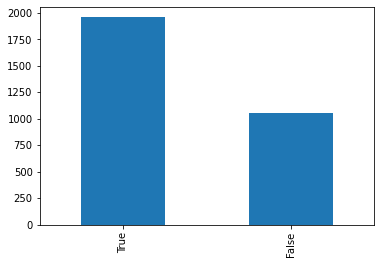

In [19]:
gdf['index_maps'].isnull().value_counts().plot.bar()

In [20]:
gdf.reset_index(inplace=True)
gdf['duplicate_no'] = (gdf.groupby('index').cumcount())

In [21]:
gdf.loc[gdf['duplicate_no'] == 0, :].shape

(2602, 139)

# drop unnecessary columns

In [22]:
drop_cols = [col for col in gdf.columns if 'change' in col]
drop_cols += ['index', 'price', 'year']
gdf.drop(labels=drop_cols, axis=1, inplace=True)

In [24]:
print(gdf.shape)
gdf.head()

(3011, 87)


,land_category,land_id,land_category_pre,land_id_pre,selected_land_status,city_id,city,address,area,usage,usage_other,building_structure,water,gas,sewerage,land_shape,front_ratio,depth_ratio,groud_floors,base_floors,road,road_direction,road_width,road_station,road_pavement,side_road,side_road_direction,road_closeness_station,surrounding_land_use,nearest_station,station_distance,use_category,fire_category,planning_category,forest_category,park_category,building_land_ratio,floor_area_ratio,included_pre,included_all,price_1983,price_1984,price_1985,price_1986,price_1987,price_1988,price_1989,price_1990,price_1991,price_1992,price_1993,price_1994,price_1995,price_1996,price_1997,price_1998,price_1999,price_2000,price_2001,price_2002,price_2003,price_2004,price_2005,price_2006,price_2007,price_2008,price_2009,price_2010,price_2011,price_2012,price_2013,price_2014,price_2015,price_2016,price_2017,price_2018,price_2019,geometry,index_maps,water_depth,area_code,author,map_date,map_doc,detail_file_id,water_depth_scaled,duplicate_no
0,000,001,000,001,1,13364,神津島,東京都 神津島村９９５番,224,住宅,_,W2,true,false,true,_,1.0,1.2,2,0,村道,南,2.2,_,_,_,_,_,一般住宅のほか民宿、店舗等が混在する住宅地域,キャンドゥ前,460,_,_,非線引,_,_,70,200,false,0000000000011111111111111111111111111,0,0,0,0,0,0,0,0,0,0,0,7600,7600,7600,7600,7600,7600,7600,7500,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,POINT (139.13642 34.20517),NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
1,005,001,005,001,1,13364,神津島,東京都 神津島村８４１番,203,"住宅,店舗",_,RC2,true,false,true,_,1.5,1.0,2,0,村道,西,3.5,_,_,_,_,_,小規模小売店舗、民宿等の建ち並ぶ近隣商業地域,キャンドゥ前,550,_,_,非線引,_,_,70,200,false,0000000000001111111111111111111111111,0,0,0,0,0,0,0,0,0,0,0,0,9500,9500,9500,9500,9500,9500,9400,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,9500,POINT (139.13731 34.20626),NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
2,000,002,000,002,1,13364,神津島,東京都 神津島村２８４番,239,住宅,_,W2,true,false,true,_,1.2,1.0,2,0,村道,南東,4.0,_,_,_,_,_,一般住宅のほか社宅等も見られる住宅地域,神津島港,1300,_,_,非線引,_,国立公（普通）,70,200,false,0000000000000000000000000000001111111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6500,6500,6500,6500,6500,6500,6500,POINT (139.14247 34.21093),NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
3,000,015,000,015,1,13228,あきる野,東京都 あきる野市戸倉字西戸倉５２５番３,309,住宅,_,W2,true,false,true,_,1.5,1.0,2,0,市道,北西,4.7,_,_,_,_,_,中規模一般住宅、農家住宅等が見られる住宅地域,武蔵五日市,2800,_,_,調区,_,_,40,80,false,0000000000111111111111111111111111111,0,0,0,0,0,0,0,0,0,0,85000,82000,80500,79000,78200,76000,68000,60000,57000,51000,47500,43000,40500,39500,39500,41600,40500,39000,38500,38200,37900,37700,37500,37400,37300,37200,37000,POINT (139.20145 35.72955),NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
4,000,023,000,023,1,13205,青梅,東京都 青梅市沢井１丁目４３４番９外,135,住宅,_,W2,true,false,true,_,1.0,1.5,2,0,私道,東,4.5,_,_,_,_,_,一般住宅のほかに農地等が混在する住宅地域,軍畑,600,1低専,_,市街化,_,国立公（普通）,40,80,false,0000000000011111111111111111111111111,0,0,0,0,0,0,0,0,0,0,0,161000,158000,149000,145000,141000,126000,106000,95000,81000,70000,62000,55300,53500,53500,55000,52800,49800,48600,47700,47100,46800,46500,46200,45800,45000,44000,POINT (139.20379 35.80562),NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0


In [26]:
gdf.dtypes

land_category                     object
land_id                           object
land_category_pre                 object
land_id_pre                       object
selected_land_status              object
city_id                           object
city                              object
address                           object
area                              object
usage                             object
usage_other                       object
building_structure                object
water                             object
gas                               object
sewerage                          object
land_shape                        object
front_ratio                       object
depth_ratio                       object
groud_floors                      object
base_floors                       object
road                              object
road_direction                    object
road_width                        object
road_station                      object
road_pavement   

# save

In [27]:
%%time
gdf.to_file('../data/input/prices_and_maps_tokyo.geojson', driver='GeoJSON')

CPU times: user 6.56 s, sys: 52 ms, total: 6.62 s
Wall time: 6.64 s


In [29]:
%%time
gdf.to_csv('../data/input/prices_and_maps_tokyo.csv', index=False)

CPU times: user 152 ms, sys: 5.45 ms, total: 157 ms
Wall time: 157 ms


# from wide to long

In [11]:
id_vars = [col for col in gdf.columns if 'price' not in col]
gdf = pd.melt(gdf, id_vars=id_vars, var_name='price_date', value_name='price')
gdf = gpd.GeoDataFrame(gdf, crs=project_crs)
gdf.shape

/Users/takuma/.local/share/virtualenvs/3_project-EB802Ycp/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(111407, 65)

In [12]:
# drop no price row
gdf['price'] = gdf['price'].astype(int)
gdf = gdf.loc[gdf['price'] != 0, :]
gdf.shape

(59404, 65)

In [13]:
gdf['price_date'] = pd.to_datetime(gdf['price_date'].apply(lambda x: x.split('_')[1]))
gdf[['price_date']]

,price_date
10,1983-01-01
20,1983-01-01
29,1983-01-01
31,1983-01-01
32,1983-01-01
...,...
111402,2019-01-01
111403,2019-01-01
111404,2019-01-01
111405,2019-01-01


# features

## time-related variables

In [14]:
gdf['time_lapse'] = gdf['map_date'] - gdf['price_date']
gdf[['time_lapse', 'map_date', 'price_date']]

,time_lapse,map_date,price_date
10,NaT,NaT,1983-01-01
20,NaT,NaT,1983-01-01
29,NaT,NaT,1983-01-01
31,NaT,NaT,1983-01-01
32,NaT,NaT,1983-01-01
...,...,...,...
111402,-4562 days,2006-07-06,2019-01-01
111403,-4925 days,2005-07-08,2019-01-01
111404,NaT,NaT,2019-01-01
111405,NaT,NaT,2019-01-01


## price log

In [15]:
gdf['price_log'] = np.log10(gdf['price'])

## inundation dummy

In [16]:
gdf['is_depth'] = gdf['water_depth_scaled'].notnull().astype(int)

## city_is_depth

In [17]:
city_is_depth = gdf.groupby('city_id').agg({'is_depth': lambda x: 0 if sum(x)==0 else 1}).reset_index()
city_is_depth.columns = ['city_id', 'city_is_depth']
gdf = pd.merge(gdf, city_is_depth, on='city_id', how='left')
gdf = gpd.GeoDataFrame(gdf, crs=project_crs)

/Users/takuma/.local/share/virtualenvs/3_project-EB802Ycp/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
